In [2]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.tokenize import MWETokenizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn import metrics
tokenizer = MWETokenizer()

plt.style.use('ggplot')
nltk.download('punkt')
nltk.download('stopwords')
class_dist = 1

### NOTE: RUN FUNCTION DEFINITIONS AT END OF NOTEBOOK BEFORE RUNNING THE REST OF THE PROGRAM


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/allisonliu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/allisonliu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
brandon = 0
if brandon == 1:
    df = pd.read_csv('2021MCMProblemC_DataSet.csv')
else:
    df = pd.read_csv('/Users/allisonliu/Desktop/MCM2021/data/2021_MCM_Problem_C_Data/2021MCMProblemC_DataSet.csv')

df_negative = df.loc[df['Lab Status'] == 'Negative ID']

df_lab = df_negative[['Notes', 'Lab Comments']] #MAKE SURE ONLY NEGATIVE!!!!!
df_lab = df_lab.applymap(lambda s:s.lower() if type(s) == str else s)
    

In [8]:
	# Separate the most common mistakes and label them as a class
	
	more_stop_words = np.array(['found', 'hornet', 'seen', 'around', 'saw'])

	stop_words = text.ENGLISH_STOP_WORDS.union(more_stop_words)

	df_digger = df_lab[df_lab['Lab Comments'].str.contains('digger', na=False)]
	df_horntail = df_lab[df_lab['Lab Comments'].str.contains('horntail', na=False)]
	df_sawfly = df_lab[df_lab['Lab Comments'].str.contains('sawfly', na=False)]
	df_cicada = df_lab[df_lab['Lab Comments'].str.contains('cicada', na=False)]
	df_wasp = df_lab[df_lab['Lab Comments'].str.contains('wasp', na=False)]

	# Replacing y values(adding class label)
	df_digger['Lab Comments'] = df_digger['Lab Comments'].apply(lambda s: 0)
	df_horntail['Lab Comments'] = df_horntail['Lab Comments'].apply(lambda s: 1)
	df_sawfly['Lab Comments'] = df_sawfly['Lab Comments'].apply(lambda s: 2)
	df_cicada['Lab Comments'] = df_cicada['Lab Comments'].apply(lambda s: 3)
	df_wasp['Lab Comments'] = df_wasp['Lab Comments'].apply(lambda s: 4)

	# Concatonate all data together
	data = np.array(pd.concat([df_digger, df_horntail, df_sawfly, df_cicada]))

	# Split into X and y (for y you need to set it as an integer array to avoid errors)
	X, y = data[:, 0], data[:, 1]
	y = y.astype('int32')

	# Split into train and test set after looking at distribution
	print(f'Digger: {len(df_digger)} Horntail: {len(df_horntail)} Sawfly: {len(df_sawfly)} Cicada: {len(df_cicada)}, Wasp: {len(df_wasp)}')
	X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42, shuffle=True)

	# Classifier pipeline (Tokenize -> Frequency of Words -> Linear SVM)
	text_clf = Pipeline([
	('vect', CountVectorizer(stop_words=stop_words)),
	('tfidf', TfidfTransformer()),
	# ('clf', MultinomialNB()),
	('clf', SGDClassifier(loss='hinge', penalty='l2',
	alpha=1e-7, random_state=42,
	max_iter=10, tol=None)),
	])

	# Train the classifier and then predict on test set
	text_clf = text_clf.fit(X_train, y_train)
	y_pred = text_clf.predict(X_test)

	# Performance Metrics
	print(metrics.classification_report(y_test, y_pred))
	print(metrics.confusion_matrix(y_test, y_pred))
	# print(f'Total number of negative cases: {len(df[df['Lab Status'] == 'Negative ID'])}')
	# print(len(df_positive), len(df_negative), len(df_unverified), len(df_unprocessed))


Digger: 465 Horntail: 374 Sawfly: 526 Cicada: 237, Wasp: 841
              precision    recall  f1-score   support

           0       0.69      0.56      0.62        80
           1       0.20      0.29      0.23        56
           2       0.19      0.19      0.19        68
           3       0.42      0.27      0.33        37

    accuracy                           0.35       241
   macro avg       0.37      0.33      0.34       241
weighted avg       0.39      0.35      0.36       241

[[45 16 13  6]
 [ 3 16 36  1]
 [ 9 39 13  7]
 [ 8 11  8 10]]


In [9]:
df_digger.columns

Index(['Notes', 'Lab Comments'], dtype='object')

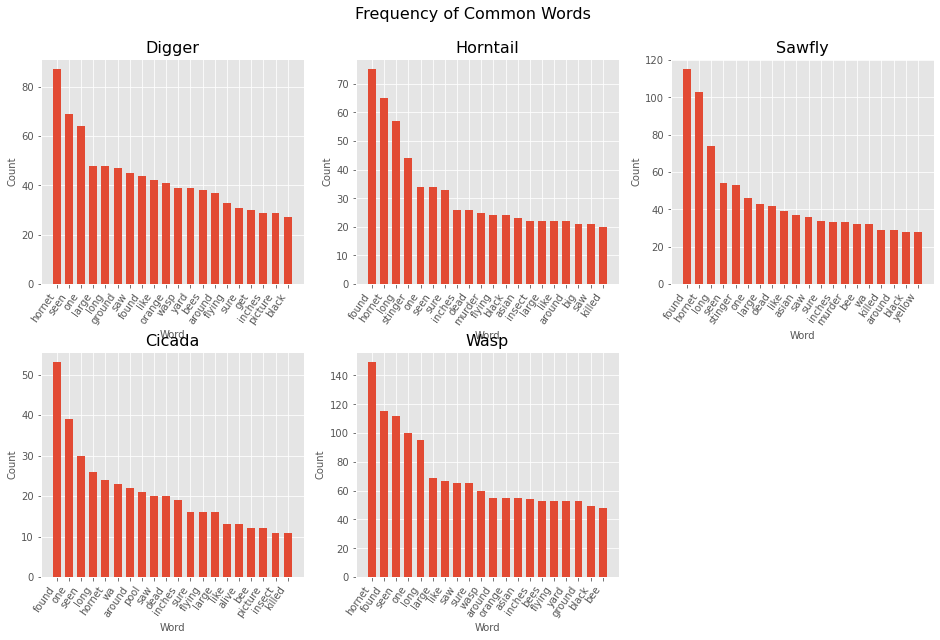

In [12]:
classes = ['Digger', 'Horntail', 'Sawfly', 'Cicada', 'Wasp']
colors = ['orange', 'teal', 'tab:pink', 'tab:brown']

### PLOT WORDS ASSOCIATED WITH EACH CLASS
# Extract the words (removing punctuation and stopwords)
# USER COMMENTS
words_digger= word_process(df_digger, 'Notes')
words_horntail = word_process(df_horntail, 'Notes')
words_sawfly = word_process(df_sawfly, 'Notes')
words_cicada = word_process(df_cicada, 'Notes')
words_wasp = word_process(df_wasp, 'Notes')

n = 20
# Count frequency of word occurrences
# USER COMMENTS
word_digger, count_digger = word_occurrences(words_digger, n)
word_horntail, count_horntail = word_occurrences(words_horntail, n)
word_sawfly, count_sawfly = word_occurrences(words_sawfly, n)
word_cicada, count_cicada = word_occurrences(words_cicada, n)
word_wasp, count_wasp = word_occurrences(words_wasp, n)

# Store in an iterable fashion
data_words = np.array([[word_digger, word_horntail, word_sawfly, word_cicada, word_wasp]])
data_count = np.array([[count_digger, count_horntail, count_sawfly, count_cicada, count_wasp]])

num_rows = 2
num_cols = 3
fig1, axs = graph_words(data_words, data_count, num_rows, num_cols, classes, colors)
axs[1][2].set_visible(False)

In [8]:
data_words[0][0].shape

(30,)

In [11]:
# ========================================================
# ========================================================
# FUNCTIONS
# ========================================================
# ========================================================
def word_process(df, column):
	# Import stopwords
	stopword_arr = nltk.corpus.stopwords.words('english')

	# Tokenize datafram column
	tokens = df[column].apply(str).apply(nltk.word_tokenize)

	# Iterate through words and remove stopwords, punctuation, and save as a lower case word
	words = []
	for sent in tokens:
		for word in sent:
			if word.lower() not in stopword_arr and word.lower().isalpha():
				words.append(word.lower())

	return words

# ========================================================
def word_occurrences(words, n):

	# Find frequency distribution of top "n" words
	d = FreqDist(words)
	freq = d.most_common(n)

	# Save the word and its count to two arrays (returned as a list)
	word = []
	count = []
	for tup  in freq:
		word.append(tup[0])
		count.append(tup[1])

	return [word, count]

# ========================================================
def graph_words(word_data, count_data, num_rows, num_cols, category, color1):

    fig, axs = plt.subplots(num_rows, num_cols, figsize=(16,9))
    data_sets = len(word_data[0])
    i = 0
    for r in range(num_rows): # num_rows + num_cols = num_subplots
        for c in range(num_cols):
            if i==data_sets:
                break
            axs[r,c].bar(word_data[0][i], count_data[0][i], width=0.65)
            axs[r,c].set_title(f'{category[i]}', fontsize=16)
            axs[r,c].set_xticks(np.arange(len(word_data[0][i])))
            axs[r,c].set_xticklabels(word_data[0][i], rotation = 55, ha='right', fontsize=10)
            axs[r,c].set_xlabel('Word', fontsize=10)
            axs[r,c].set_ylabel('Count', fontsize=10)
            # axs[r,c].tick_params(axis='both', labelsize=10)
            # axs[r,c].set_fontsize = 12
            i+=1
       
    left  = 0.125  # the left side of the subplots of the figure
    right = 0.9    # the right side of the subplots of the figure
    bottom = 0.1   # the bottom of the subplots of the figure
    top = 0.9      # the top of the subplots of the figure
    wspace = 0.2   # the amount of width reserved for blank space between subplots
    hspace = 0.3   # the amount of height reserved for white space between subplots
    plt.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)
    plt.suptitle('Frequency of Common Words', fontsize=16)

    return fig, axs
	# plt.legend()
# ========================================================
